
# Project: Investigate a Dataset - TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

We are working with the TMDb movie dataset that contains at least 10.000 values of movie data released all over the years. When we talk about movies details, we refer to the atributtes included in the dataset as follows:

* id 
* imdb_id
* popularity
* budget
* revenue
* original_title
* cast
* homepage
* director
* tagline
* keywords
* overview
* runtime
* genres
* production_companies
* release_date
* vote_count
* vote_average
* release_year
* budget_adj
* revenue_ adj

Looking at these attributes, it could be important to give some brief explanation of some of them, such as:
* vote_count: stands for number of votes given to a movie
* vote_average: stands for the average of vote classification given from the vote count
* budget_adj: stands for the budget of the associated movie in terms of 2010 dollars, accounting for inflation over time.
* revenue_ adj: stands for the reveue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
 


### Question(s) for Analysis

The present report is planned to answer the following questions during the analysis course:

1.  Which genre of movie tends to be more appreciated (in terms of voting)?


2. Has nowadays movies been well received by people comparing to old movies?


3. What is the best month of the year used to release the movie?


4. Ranking of the best production companies from year to year on TMDb. By how much?


5. Does long runtime movies are more expensive to produce compared to short runtime movies?


6. Which genre of movie trends to be more expensive to produce?


7. Which movie director directed the prodution of movies (more than one) that became popular in relation to others, in the most recent year in the dataset?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas

Requirement already up-to-date: pandas in /opt/conda/lib/python3.6/site-packages (1.1.5)


<a id='wrangling'></a>
## Data Wrangling


### General Properties
For this process, it is necessary to explore the general properties of the dataset, the way that it can lead us to decide what actions can be done to turn the dataset into a clean and accurate one for analysis.

In [3]:
df = pd.read_csv('tmdb-movies.csv')

In [4]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


* Show the dimentions of the dataset. 

In [5]:
df.shape

(10866, 21)

* Show the data type of each column in the dataset.

In [6]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

* Show the number of not null values in each column, so as their data types, in the dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

* Show the number of null values in each column.

In [8]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

* Show how many duplicated rows are in the dataset.

In [9]:
sum(df.duplicated())

1

* Show how many unique values are in each column in the dataset.

In [10]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

* Show some statistic results of all numerical columns in the dataset.

In [11]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning
From the investigation of the data above and based on the questions to analyse, the following cleaning steps are going to be taken:
 

* Budget : transform to float
* Revenue : transform to float 

In [12]:
df['budget'] = df['budget'].astype(float) # Change the budget data type to float

In [13]:
df['revenue'] = df['revenue'].astype(float) # Change the revenue data type to float

* Release date: transform to date

In [14]:
def arrange_date(x):
    if (int(x[2]) > 20):
        x[2] = x[2].replace(x[2], '19'+x[2]) 
    else:
        x[2] = x[2].replace(x[2], '20'+x[2])
    if (int(x[1]) < 10):
        x[1] = x[1].replace(x[1], '0'+x[1])
    if (int(x[0]) < 10):
        x[0] = x[0].replace(x[0], '0'+x[0])
    x = x[0]+x[1]+x[2]
    return x

In [15]:
df['release_date'] = df['release_date'].apply(lambda x: x.split('/')) # Calls a function to split each date into 3 parts (month, day and year)

df['release_date'] = df['release_date'].apply(lambda x: arrange_date(x)) # Calls the function to arrange the date

df['release_date'] = pd.to_datetime(df['release_date'], format='%m%d%Y') #Format the date of each row in datetime type

* There is one duplicated arrow, so it can be dropped as follows.

In [16]:
df = df.drop_duplicates() 

sum(df.duplicated())

0

* There are various null rows in some columns of String data type, but there is no need to fill any value in them, due to the description of each of column, turning difficult to preview what type of value could fill the columns. Fortunatelly, those columns are "Tagline", "Keywords", "Overview" and "homepage" that are not needed for the analysis. So they can be dropped as follows.

In [17]:
df.drop(['tagline', 'keywords', 'overview', 'homepage'], axis = 1, inplace = True) # drop columns not needed to the analysis in the dataset

* Beside these columns, there are columns like cast, genre and production_companies that will be used to answer the questions. Therefore, having null values in them will not help to make the analysis. So, the null values in these columns will be dropped so as the rows that contains these null values.

In [18]:
df.dropna(inplace = True) # drop rows with any null values in the dataset
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

* Genres and Production_Companies columns have multiple values that were separated with '|' in each row. turning difficult to make some of the analisys needed. It will be necessary to trim each column value as follows.

* Based in the questions defined above, it will be created two separated datasets (that contains the rows with the '|' character in 'genre' and 'production_companies' columns). One of the dataframes will contain the 'genres' column trimmed, and other the 'production_companies' column trimmed for later analysis.

In [19]:
g_df = df[df['genres'].str.contains('|')] # dataframe containing multiple genre values in a row
p_df = df[df['production_companies'].str.contains('|')] # dataframe containing multiple production companies values in a row

In [20]:
print(g_df.shape)
print(p_df.shape)

(9770, 17)
(9770, 17)


    - As the results above, it is clear that all the columns contais 9770 rows as the cleaned dataframe, but we want to take more than one value from each column ('genre' and 'production_companies') of each dataframe and separate them for future analysis. So after separating the values of the columns, the last step is to replace those separated values in the two datasets created above were they belong.

    - There's a function that will help us trim and separate each value in the rows of a determinated column:

In [21]:
def split_values(x, i, df, column):
    ind = df[df[column] == x].index.values # gets the index of the row
    x = x.split('|')  # split the multiple values in each row of the column
    if (i == 0):
        return x[i]
    elif (i < len(x)):
        return x[i]   # check if the row has any value in the index i after splitting 
    else:
        df.drop(ind)  # drop the row that contain values trimmed in other dataframe in the same row

    - For separating values in 'genre' column, it will be needed hybrid dataframes. We will use the function above to split the values in the column and separate them into different rows. Lastly, it will be cancatenated into one dataframe, that will be used in for further actions.

In [22]:
g1_df = g_df.copy()
g2_df = g_df.copy()
g1_df['genres'] = g_df['genres'].apply(lambda x: split_values(x, 0, g_df, 'genres'))
g2_df['genres'] = g_df['genres'].apply(lambda x: split_values(x, 1, g_df, 'genres'))

    - Having the two hybrid dataframes with the first and second value of each row in genre column, the final step is to join the dataframes and save them to the genre dataframe.

In [23]:
g_df = pd.concat([g1_df, g2_df])
g_df

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0.0,0.000000e+00,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,None,Bruce Brown Films,1966-06-15,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0.0,0.000000e+00,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Adventure,Cherokee Productions|Joel Productions|Douglas ...,1966-12-21,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0.0,0.000000e+00,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Comedy,Mosfilm,1966-01-01,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0.0,0.000000e+00,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Comedy,Benedict Pictures Corp.,1966-11-02,22,5.4,1966,0.000000e+00,0.000000e+00


    - For each 'production_companies' row we will use in maximum first two values as sample:

In [24]:
p1_df = p_df.copy()
p2_df = p_df.copy()
p1_df['production_companies'] = p_df['production_companies'].apply(lambda x: split_values(x, 0, p_df, 'production_companies'))
p2_df['production_companies'] = p_df['production_companies'].apply(lambda x: split_values(x, 1, p_df, 'production_companies'))

    - Finally, the hybrid dataframes will be joined as follows.

In [25]:
p_df = pd.concat([p1_df, p2_df])
p_df

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0.0,0.000000e+00,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,None,1966-06-15,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0.0,0.000000e+00,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Joel Productions,1966-12-21,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0.0,0.000000e+00,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,None,1966-01-01,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0.0,0.000000e+00,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,None,1966-11-02,22,5.4,1966,0.000000e+00,0.000000e+00


* It was noted that 'budget' and 'revenue' columns do not have null values but have values represented as '0.0', that can be described as null. It is show below:

In [26]:
df[df['revenue'] == 0.0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000.0,0.0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,2015-01-14,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000.0,0.0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,2015-05-21,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0.0,0.0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,2015-06-24,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,0.0,0.0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,105,Comedy|Drama,Indian Paintbrush,2015-06-12,569,7.7,2015,0.000000e+00,0.0
92,370687,tt3608646,1.876037,0.0,0.0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,2015-12-19,11,5.4,2015,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0.0,0.0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,1966-06-15,11,7.4,1966,0.000000e+00,0.0
10862,20379,tt0060472,0.065543,0.0,0.0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,1966-12-21,20,5.7,1966,0.000000e+00,0.0
10863,39768,tt0060161,0.065141,0.0,0.0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,1966-01-01,11,6.5,1966,0.000000e+00,0.0
10864,21449,tt0061177,0.064317,0.0,0.0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,1966-11-02,22,5.4,1966,0.000000e+00,0.0


    - The number of rows containing these values are more than the half of total rows of the cleaned dataframe, turning to the decision of not being necessary to drop these rows, because these values could have some meaning or reason for existence. 

<a id='eda'></a>
## Exploratory Data Analysis

For the research of the questions posed in the Introduction section,  it will be computed the relevant statistics to compare and show trends in the visualizations related to the data, based in the questions.

###  1. Which genre of movie tends to be more appreciated (in terms of voting)?

* We will start the research of this question plotting the histogram for Vote Average distribution.

6.0

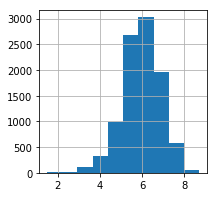

In [27]:
df['vote_average'].hist(figsize = (3, 3))
df['vote_average'].median()

As it is shown above, most of the films tend to have a vote average between 5 to 7 points, and very few of them tend to have more than 8 or less than 4 points as vote.

This plot can lead to the conclusion that the vote average is evenly distributed and not up the sides, stretching across the entire graph. Furthermore, it is balanced toward the center of the frame, with no obvious skew.

* Furthermore, it will be calculated the mean value of vote average in function of each genre of movie using the genre dataframe created, as shown above:

Text(0,0.5,'Vote Average')

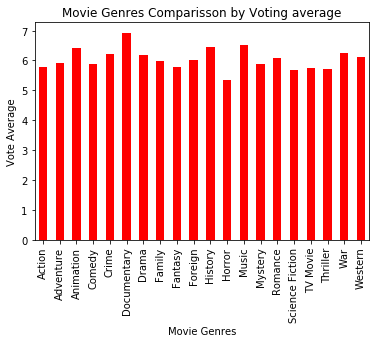

In [28]:
genre = g_df.groupby(['genres'])['vote_average'].mean()
genre.plot(kind = 'bar', color = 'red', figsize=(6, 4))
plt.title('Movie Genres Comparisson by Voting average')
plt.xlabel('Movie Genres')
plt.ylabel('Vote Average')

The plot results tells that Documentary genre could be the most appreciated by people.

Note: Each movie can have more than one genre and for this analysis where used in maximum only two of those values as sample, because of the number of processes that could be executed in large amount of data generated in spliting phase. With that in mind, the statistical result for this question can be different if we decide to add all the data provided by the dataset.

### 2. Has nowadays movies been well received by people comparing to old movies?

* We will start the research of this question plotting the histogram for Release year distribution of movies.

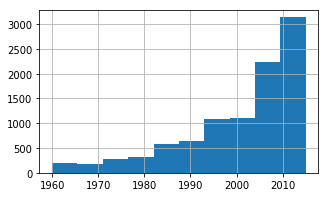

In [29]:
df['release_year'].hist(figsize = (5, 3))

As we can see, the number of movies released every year tends to be larger than the previous year.  

* Plotting the Scatterplot of Release Year in Relation to Vote Average.

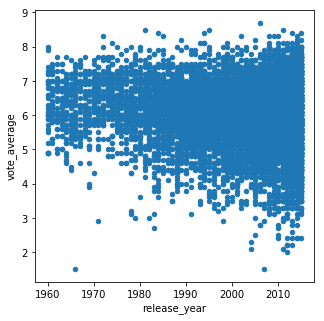

In [30]:
df.plot(kind = 'scatter', x = 'release_year', y = 'vote_average', figsize = (5, 5))

This data don't have any kind of pattern, which means that no relationship exists between Release year and Vote average.

* Lastly, for research using the bar plotting, we will define a median first, which function is to separate old movies from modern movies based in the released date. Next step is to define the average vote_average of these two types to compare.

In [31]:
m = pd.Timestamp(df['release_date'].astype(np.int64).median())
old_movies = df[df['release_date'] < m]
old_movies = old_movies['vote_average'].mean()
modern_movies = df[df['release_date'] >= m]
modern_movies = modern_movies['vote_average'].mean()

>Having old movies and modern movies well separated and defined, the results are shown in the plot bar above.

Text(0,0.5,'Vote Average')

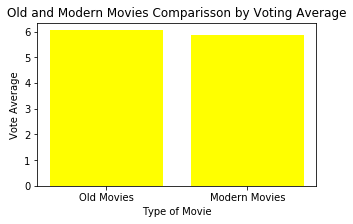

In [32]:
x = [1 , 2]
y = [old_movies, modern_movies]
label = ['Old Movies', 'Modern Movies']
plt.figure(figsize = (5,3))
plt.bar(x, y, tick_label = label, color = 'yellow')
plt.title('Old and Modern Movies Comparisson by Voting Average')
plt.xlabel('Type of Movie')
plt.ylabel('Vote Average')

It is shown that old movies are more rated than modern movies. Note that the answer to this question is not limited to only these parameters.

### 3. What is the best month of the year used to release the movie?

* We will start the research of this question plotting the histogram for Release month distribution of movies.

>Creating a dataframe containing the release month of each movie to help us reseach this question.

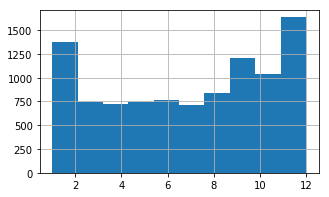

In [33]:
df_months = df.copy()
df_months['release_month'] = pd.DatetimeIndex(df_months['release_date']).month
df_months['release_month'].hist(figsize = (5, 3))

This shows that most of the movies are released at the end of the year until the beginning of the year (from November to February).

* Plotting the Scatterplot of Release Month in Relation to Revenue.

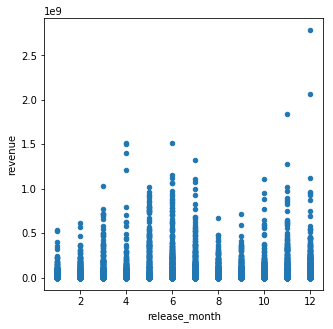

In [34]:
df_months.plot(kind = 'scatter', x = 'release_month', y = 'revenue', figsize = (5, 5))

This data don't have any kind of pattern too, which means that no relationship exists between Release month and Revenue.

* To see the bar plot of this question, it will be calculated the mean value of revenue in function of each release month of the movies.

In [35]:
df_months = df_months.groupby(df_months['release_month'])['revenue'].mean()

>Having the dataframe for the question defined, there is the plot bar to show the result.

Text(0,0.5,'Revenue Value')

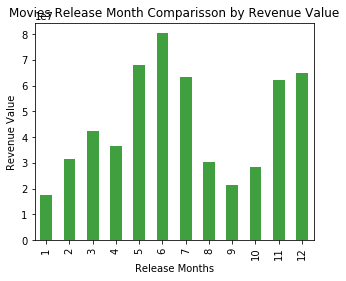

In [36]:
df_months.plot(kind = 'bar', color = 'green', figsize=(5, 4), alpha = 0.75)
plt.title('Movies Release Month Comparisson by Revenue Value')
plt.xlabel('Release Months')
plt.ylabel('Revenue Value')

The plot shows that movies released in June month tend to be the ones with more revenue value, followed by movies released in May and December months.

Note: These results are not so trustful due to no correlation existing between these two parameteres seen in the analysis above.

### 4. Ranking of the best production companies from year to year in TMDb. By how much? 

* Plotting the histogram for Revenue distribution of movies.

In [1]:
df['revenue'].hist(figsize = (6, 3))
df['revenue'].median()

NameError: name 'df' is not defined

The plot shows that the distribution is skewed to the right, which means that most of the movies tend to have less than 250 millions of revenue and few of them more than that.

* For the bar plot, it will be used the production companies dataframe created before, where it will be calculated the mean value of the entire dataframe based in each production company in each year.

In [38]:
p_df = p_df.groupby(['release_year', 'production_companies']).mean()

>The next step is to get the labels for our plot, that can be determined by maximum revenue value index (that will be in String form containing the release year and production company together, due to the change of index type made in the step above) in each year

In [39]:
p_df1 = p_df.groupby(['release_year']).idxmax()
labels = p_df1.loc[:, 'revenue']

>That done, we get the maximum revenue value in each year as height(y) of our plot.
>
>The width(x) or number of bars will correspond to the number of index in one of the dataframes.

In [40]:
p_df2 = p_df.groupby(['release_year']).max()
y = p_df2.loc[:, 'revenue']

x = p_df2.index.values

>Finally, the results are above.

Text(0,0.5,'Revenue Earned by Each Company')

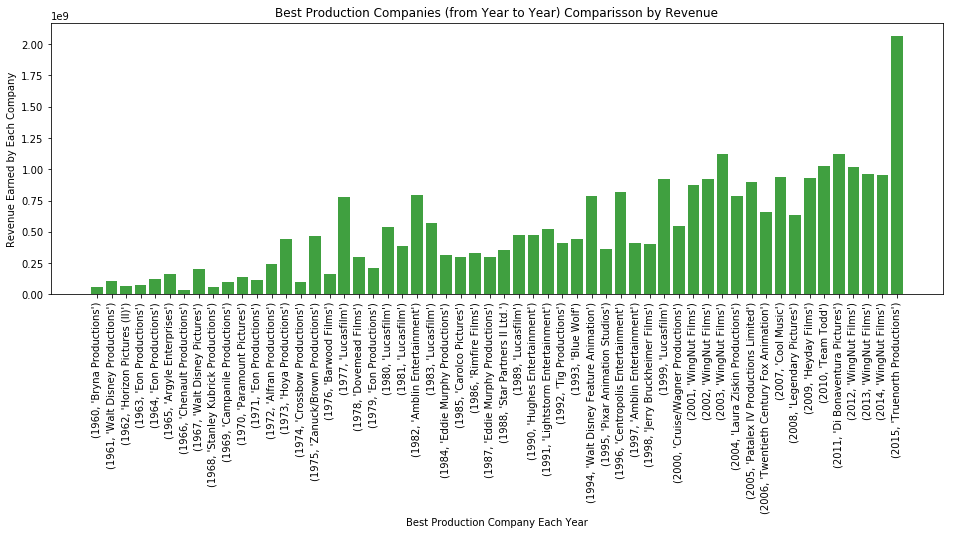

In [41]:
plt.figure(figsize = (16,5))
plt.bar(x, y, tick_label = labels, alpha = 0.75, color = 'green')
plt.xticks(rotation = 90)
plt.title('Best Production Companies (from Year to Year) Comparisson by Revenue')
plt.xlabel('Best Production Company Each Year')
plt.ylabel('Revenue Earned by Each Company')

Based in this bar plot, the best production company in terms of revenue is the Truenorth Productions that had the highest amount of revenue in 2015 year. Even so, the other production companies shown in the bar plot are the most sucessful in these years too.

Note: These results can be analysed more precisely and accurately with other more parameters too.

### 5. Does long runtime movies are more expensive to produce compared to short runtime movies?

* We will start the research of this question plotting the histogram for Budget and Runtime Distribution.

200000.0

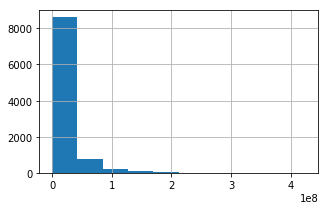

In [42]:
df['budget'].hist(figsize = (5, 3))
df['budget'].median()

The plot shows that the distribution is skewed to the right, which means that most of the movies tend to have less than 50 millions of budget invested to its production and few of them more than a hundred million.

100.0

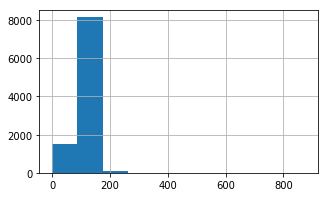

In [43]:
df['runtime'].hist(figsize = (5, 3))
df['runtime'].median()

The plot shows that the distribution is skewed to the left, which means that most of the movies tend to have more than 100 runtime minutes and few of them less than 100 minutes.

* Plotting the Scatterplot of Movie Runtime in Relation to Budget.

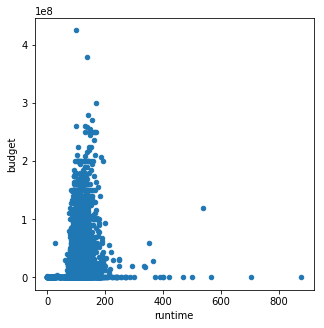

In [44]:
df.plot(kind = 'scatter', x = 'runtime', y = 'budget', figsize = (5, 5))

This data don't have any kind of pattern too, which means that no relationship exists between Runtime and Budget.

* Bar plot for the question research.

> It will be defined a median first, which function is to separate short runtime movies from long runtime movies based in the runtime median, so as define the average budget of these two types to compare as next step.

In [45]:
m = df['runtime'].median()
short_movies = df[df['runtime'] < m]
short_movies = short_movies['budget'].mean()
long_movies = df[df['runtime'] >= m]
long_movies = long_movies['budget'].mean()

> The answer for the question above.

Text(0,0.5,'Budget')

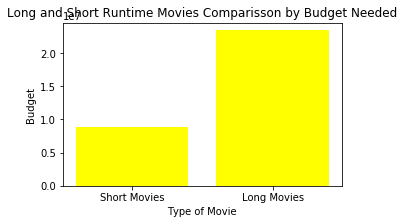

In [46]:
x = [1 , 2]
y = [short_movies, long_movies]
label = ['Short Movies', 'Long Movies']
plt.figure(figsize = (5,3))
plt.bar(x, y, tick_label = label, color = 'yellow')
plt.title('Long and Short Runtime Movies Comparisson by Budget Needed')
plt.xlabel('Type of Movie')
plt.ylabel('Budget')

The results above clearly show that long runtime movies can be more expensive to produce.

### 6. Which genre of movie tends to be more expensive to produce?

To this question, it will be calculated the mean value of budget in function of each genre of movie using the genre dataframe created, as shown above:

Text(0,0.5,'Budget Average')

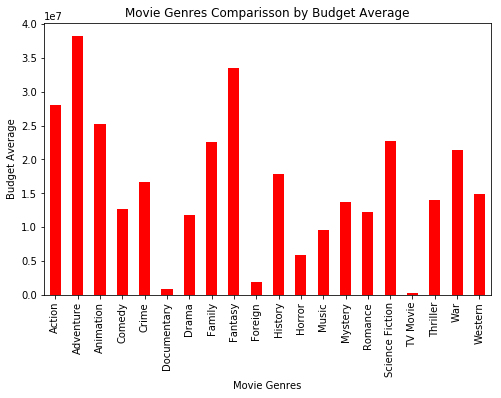

In [47]:
genre_df = g_df.groupby(['genres'])['budget'].mean()
genre_df.plot(kind = 'bar', color = 'red', figsize=(8, 5))
plt.title('Movie Genres Comparisson by Budget Average')
plt.xlabel('Movie Genres')
plt.ylabel('Budget Average')

The answer for this question shows that Adventure movies tend to be the most expensive genre to be produced, followed by Fantasy movies.

### 7. Which movie director directed the prodution of movies (more than one) that became popular in relation to others, in the most recent year in the dataset?

* Histogram plot of Movie Popularity Distribution

0.41976199999999997

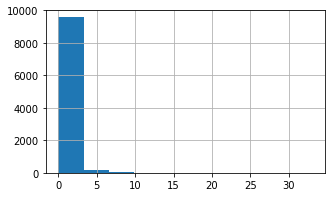

In [48]:
df['popularity'].hist(figsize = (5, 3))
df['popularity'].median()

The plot shows that the distribution of movie popularity is skewed to the right, which means that most of the movies trend to have less than 0.4 of popularity.

* Bar plot for the question research.

> For this question is going to be defined a dataframe that contains the data of movies released in 2015 year and the directors responsibles for more than one movies in the same year. That done, it will be calculated the average popularity of the movies in function of each director.

In [49]:
dir_df = df.query('release_year == 2015')
dir_df = dir_df[dir_df['director'].duplicated()]
dir_df = dir_df.groupby(['director']).mean()['popularity']

>The answer for the question is above.

Text(0,0.5,'Movies Popularity Average')

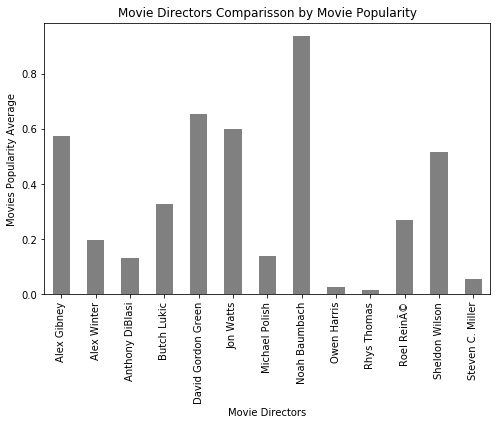

In [50]:
dir_df.plot(kind = 'bar', color = 'gray', figsize=(8, 5))
plt.title('Movie Directors Comparisson by Movie Popularity')
plt.xlabel('Movie Directors')
plt.ylabel('Movies Popularity Average')

The result tells us that Noah Baumbach was the movie director that produced the most popular movies between directors that produced more than one movie in the 2015 year.



<a id='conclusions'></a>
## Conclusions

As conclusion of this dataset analysis, it will be organized all the findings based in the questions defined above:

>The Documentary genre could be the most appreciated movie genre. That said, most of the films tend to have a vote average between 5 to 7 points, and very few of them tend to have more than 8 or less than 4 points as vote, making sense because the Documentary movies genres has the vote average almost to 7 points in relation to other movie genres.

> Besides the amount of modern movies is larger than the old movies amount, the old movies had way better vote rating in relation to modern movies, but, it does not mean that there is a relationship between the release year of the movie and the vote average of it, because there are still too many modern movies with good rating points compared to old movies, as it is shown in the scatterplot of the question research.

>Most of the movies are released at the end of the year until the beginning of the year (from November to February), but most of the movies released in June month tend to be the ones with more revenue value, followed by movies released in May and December months. Even so, these results are not so trustful due to no correlation existing between the release month and revenue parameteres.

>Most of the movies tend to have less than 250 millions of revenue and few of them more than that. That said, the best production company in terms of revenue is the Truenorth Productions that had the highest amount of revenue in 2015 year, which means that it could have been responsible for few movies, but the revenue value was so high that the production company still outstanded.

>Most of the movies tend to have less than 50 millions of budget invested to its production and few of them more than a hundred million, so as most of these movies tend to have more than 100 runtime minutes and few of them less than 100 minutes. Regardless the lack of relationship between Runtime and Budget of a movie, long runtime movies can be more expensive to produce. Why? Maybe because these expensive movies are the ones that have more than 100 runtime minutes. 
>
>This question can be deeply researched based on other parameters too. 

>Adventure movies tend to be the most expensive genre to be produced, followed by Fantasy movies. 

>Lastly, most of the movies trend to have less than 0.4 of popularity, and Noah Baumbach was the movie director that produced the most popular movies between directors that produced more than one movie in the 2015 year (the most recent year included in the dataset).


### Limitations

>The results can not be so accurate because of the limitation of the number of attributes used, such as genres and production companies of the dataset used to the processes.

>The questions were analysed with limited parameters because of the limited scope of analysis, making the results not so accurate and reliable. The statistical result for some questions can be different if we decide to add all the data provided by the dataset.